In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)

/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import Niche_YOLO_NAS
from super_gradients.training.models import get as get_model
from super_gradients.training import Trainer
DIR_OUT = os.path.join(ROOT, "data", "cow200", "yolov5")
name_task = "n200_yolo_na_i1_trial100"
best_chekpoint = "ckpt_best.pth"
log_txt = "experiment_logs_Aug02_13_49_27.txt"
data_yaml_path = os.path.join(DIR_OUT, "data.yaml")
log_file_path = os.path.join(ROOT, name_task, log_txt)


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-08-25 00:40:01] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-25 00:40:02] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-08-25 00:40:08] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-25 00:40:08] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-25 00:40:08] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-25 00:40:08] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-25 00:40:08] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
## Loading architecture
model = Niche_YOLO_NAS(
    path_model='yolo_nas_l',
    dir_train=os.path.join(DIR_OUT, "train"),
    dir_val=os.path.join(DIR_OUT, "val"),
    dir_test=os.path.join(DIR_OUT, "test"),
    name_task=""
)

[2023-08-25 00:40:12] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [4]:
### load the best model
best_model_path = os.path.join(ROOT, name_task, best_chekpoint)
best_model = model.load(best_model_path)

[2023-08-25 00:40:13] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth EMA checkpoint.


In [5]:
model.evaluate_trained_model(best_model, data_yaml_path, data_type='test')

Caching annotations:   0%|          | 0/221 [00:00<?, ?it/s]

model /Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth loaded


Test:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Test: 100%|██████████| 14/14 [03:48<00:00, 12.95s/it]

{'Precision@0.50': tensor(0.1440),
 'Recall@0.50': tensor(0.9995),
 'mAP@0.50': tensor(0.9759),
 'F1@0.50': tensor(0.2518)}

Test: 100%|██████████| 14/14 [03:58<00:00, 17.00s/it]


Confusion Matrix: [[        357          21]
 [         52           0]]
Mean Average Precision: 0.8645043191403559
Precision per class: 0.8728606356968215
Recall per class: 0.9444444444444444
Average Precision: 0.8728606356968215
Average Recall: 0.9444444444444444


(ConfusionMatrix(matrix=array([[        357,          21],
        [         52,           0]]), num_classes=1, conf_threshold=0.5, iou_threshold=0.5),
 0.8645043191403559)

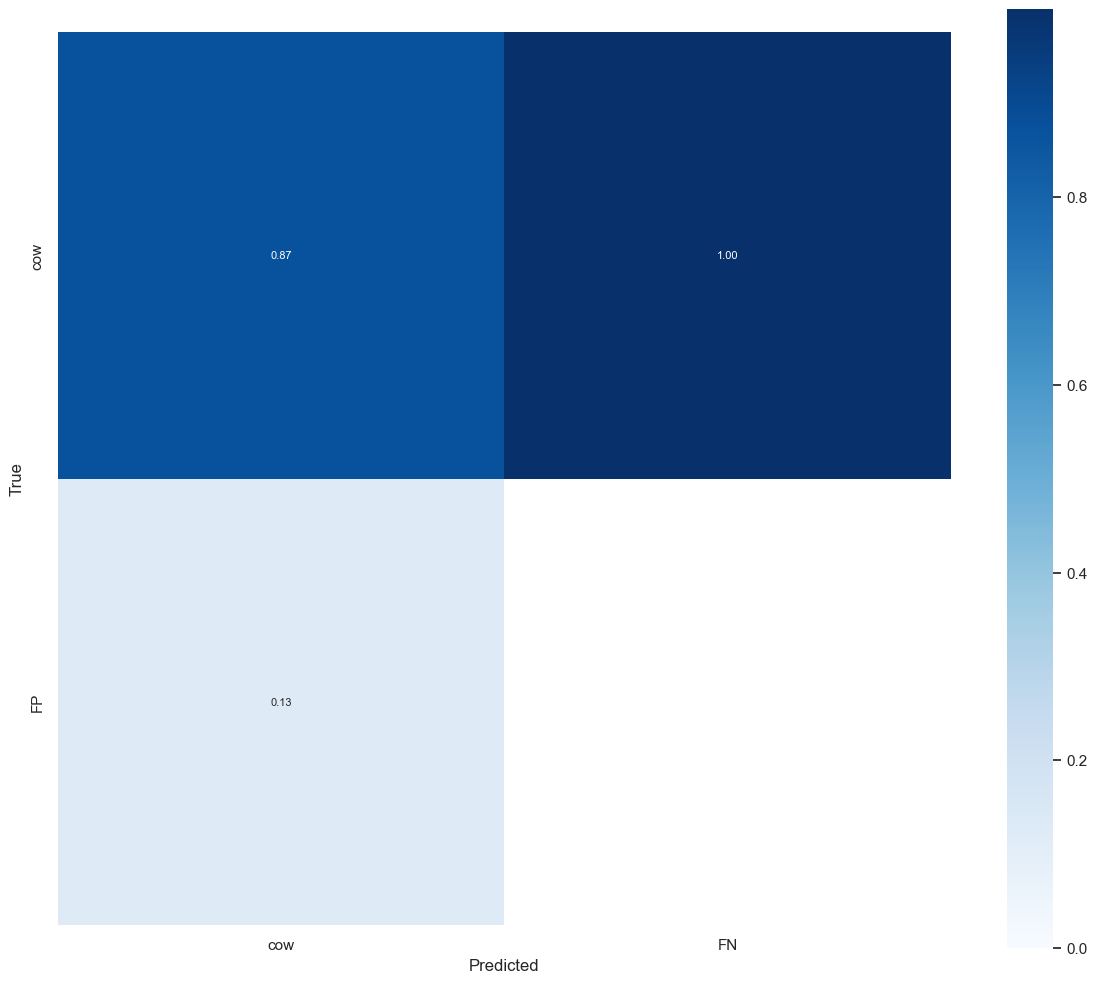

In [6]:
model.get_evaluation_matrix(best_model, data_yaml_path, data_type='test', conf=0.5, plot=True)
